In [2]:
import cv2
import numpy as np


img = cv2.imread('./hat_1/page_15.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 2)
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 2)

In [3]:
edged = cv2.Canny(dilation, 30, 200)

In [4]:
cnt, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


295 62071.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

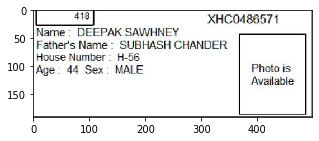

In [8]:
for i in range(len(cnt)):

    area = cv2.contourArea(cnt[i])
    if area>36000 and area<100000 and i<296: 
        print(i, area)
        x,y,w,h = cv2.boundingRect(cnt[i])
        crop= img[ y:h+y,x:w+x]
        plt.figure(figsize= (5,5))
        plt.imshow(crop)
        plt.show()
#         cv2.imwrite('cropped' + fileName[i] + '_'+ '.jpg', crop)
    